# TSA primary instruments

In [1]:
import numpy as np
import numpy.random as rand
import seaborn as sbr
import matplotlib.pyplot as plt
from pandas.tools.plotting import autocorrelation_plot
from statsmodels.graphics.tsaplots import plot_acf
import h5py 
%matplotlib inline

C:\Users\PRINT\Anaconda3\lib\site-packages\statsmodels\compat\pandas.py:56: FutureWarning: The pandas.core.datetools module is deprecated and will be removed in a future version. Please use the pandas.tseries module instead.
  from pandas.core import datetools
C:\Users\PRINT\Anaconda3\lib\site-packages\h5py\__init__.py:34: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  from ._conv import register_converters as _register_converters


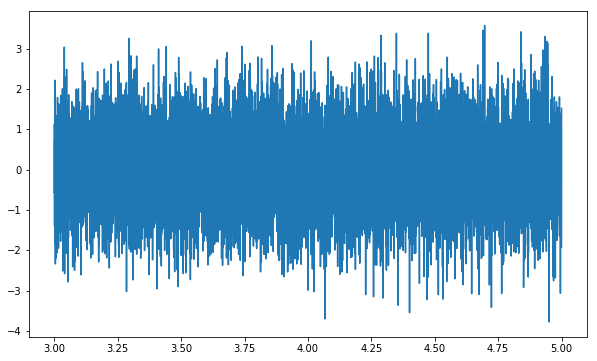

In [4]:
X = rand.randn(10000)
t = np.linspace(3, 5, num=10000)

plt.figure(figsize=(10, 6))
plt.plot(t,X)

In [15]:
mean1 = np.mean(X)
N = X.shape[0]
mean2 = (1 / N) * np.sum(X)

print('mean1 = ', m1, '\n', 'mean2 = ', m2)

mean1 =  0.004639550299505697 
 mean2 =  0.004639550299505697


In [16]:
dispersion1 = np.var(X)
dispersion2 = (1 / (N - 1)) * np.sum((X - m2)**2)

print('dispersion1 = ', dispersion1, '\n', 'dispersion2 = ', dispersion2)

dispersion1 =  0.9838235933399803 
 dispersion2 =  0.9839219855385342


In [17]:
asymmetry = np.mean(np.abs((X - mean1)**3)) / dispersion1**3/2
excess = np.mean(np.abs((X - mean1)**4)) / dispersion1**2

print('asymmetry = ', asymmetry, '\n', 'excess = ', excess)

asymmetry =  0.8148131826626606 
 excess =  2.9810443749360442


In [18]:
def autocorr(arr):
    res = np.correlate(arr, arr, mode = 'full')
    return res[res.size // 2:]

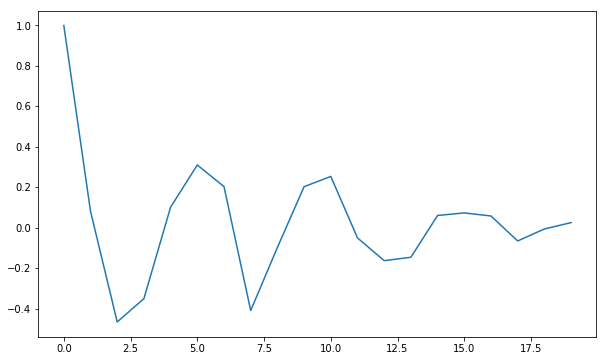

In [19]:
Xc = X[0:20]
Xc = autocorr(Xc)
#Xc = (Xc - Xc.min()) / (Xc.max() - Xc.min())
Xc = Xc / np.abs(Xc.max())

plt.figure(figsize=(10, 6))
plt.plot(Xc)

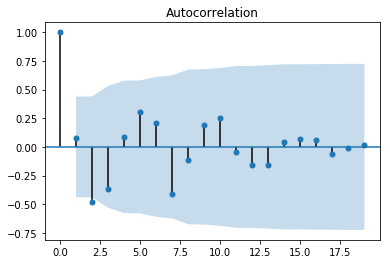

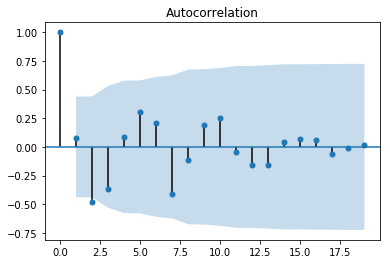

In [20]:
plot_acf(X[0:20])

C:\Users\PRINT\Anaconda3\lib\site-packages\ipykernel_launcher.py:2: FutureWarning: 'pandas.tools.plotting.autocorrelation_plot' is deprecated, import 'pandas.plotting.autocorrelation_plot' instead.
  


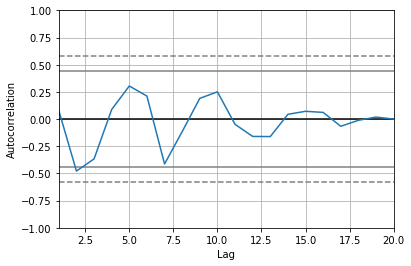

In [21]:
Xc = X[0:20]
autocorrelation_plot(Xc)

In [22]:
def corr(y, n):
    asc1 = np.zeros(n)
    N = len(y)
    for i in range(0, n):
        acs = (N - 1) * np.sum(y[i] * y[i + 1]) - np.sum(y[i]) * np.sum(y[i + 1]) / np.sqrt((N - 1) * np.sum(y[i]**2) - (np.sum(y[i]))**2) * np.sqrt((N - 1) * np.sum(y[i + 1]**2) - (np.sum(y[i + 1]))**2)
        asc1[i] = acs / 1000
    return asc1

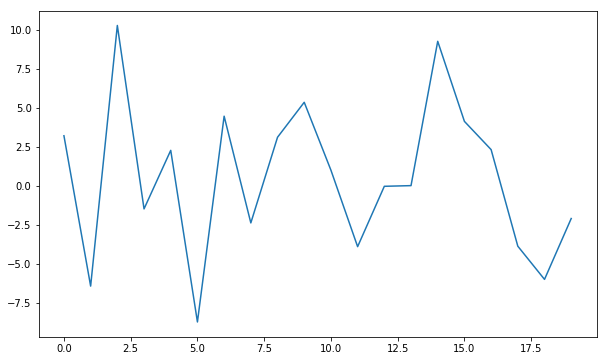

In [23]:
ff = corr(X, 20)

plt.figure(figsize=(10, 6))
plt.plot(ff)

In [40]:
def series_analyzer(arr):
    arr_m = np.mean(arr)
    arr_disp = np.var(arr)
    arr_a = np.mean(np.abs((X - arr_m)**3)) / arr_disp**3/2
    arr_e = np.mean(np.abs((X - arr_m)**4)) / arr_disp**2
    return arr_m, arr_disp, arr_a, arr_e

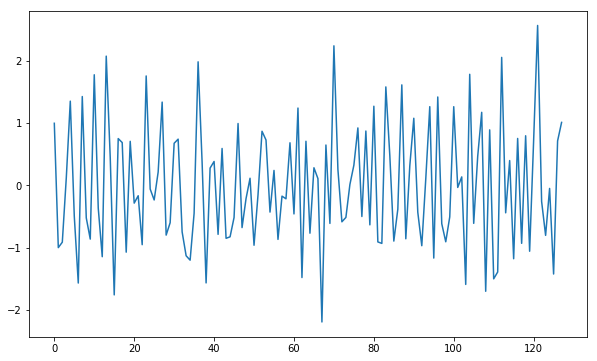

In [41]:
f = h5py.File('12.mat', 'r') 
data = f.get('z12') 
z12 = np.array(data)

plt.figure(figsize=(10, 6))
plt.plot(z12)

In [42]:
m, d, a1, e1 = series_analyzer(z12)
print('mean = ', m, '\n', 'dispersion = ', d, '\n', 'asymmetry = ', a1, '\n', 'excess = ', e1)

mean =  0.0012860710384378082 
 dispersion =  0.9952239990699998 
 asymmetry =  0.7871575947020515 
 excess =  2.913335449389018
